# <div id="container" style="position:relative;">
<div style="float:left"><h1>Pre-trained model MobileNetV3 </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />
</div>
</div>

**Name: Ali Razi**

**Contact: ali.razi9292@gmail.com**

**Date: 08-09-2023**

---

The primary objective of this Jupyter notebook is to utilize machine learning techniques to estimate the size of tumors in breast cancer patients. This estimation serves as a valuable tool for both medical practitioners and patients, offering a clearer understanding of the stages of cancer.

In our previous notebook, we conducted a comprehensive exploration and preprocessing of the data. Now, we are building and evaluating various machine learning models using the resulting dataframes: 'data_train_eda_dir,' 'data_val_eda_dir,' and 'data_test_eda_dir.' Throughout this notebook, we will apply hyperparameter optimization techniques and assess the performance of these models using different metrics.

One of the central elements of this notebook is the utilization of the MobileNetV3Small model architecture from TensorFlow's Keras Applications. This model, pre-trained on ImageNet, allows us to exclude the top layers and apply global max pooling, making it suitable for our specific task. Additionally, we will create a custom neural network model called MV_model using the Sequential API provided by Keras.

Furthermore, we will employ LIME (Local Interpretable Model-agnostic Explanations), a technique for explaining machine learning model predictions on individual instances. LIME provides interpretable explanations for these predictions, enhancing our understanding of the model's decision-making process.

---

# Notebook Content 

**Data Preparation and Image Generators**

Loading and preprocessing data.
Introduction to Image Generators.
Splitting the data into training, validation, and test sets.
Data augmentation techniques.

**Utilizing MobileNetV3Small from TensorFlow Keras Applications**

Introduction to the MobileNetV3Small model architecture.
How it is pre-trained on ImageNet.
Removing the top layers and applying global max pooling.
Preprocessing the data to match the model's input requirements.


**Instantiating a Custom Neural Network Model**

Creating a custom neural network model named MV_model.
Overview of the architecture and layers used in MV_model.
Model compilation: Defining loss function, optimizer, and evaluation metrics.

**Model Training and Hyperparameter Optimization**

Training MV_model on the training data.
Monitoring training and validation loss curves.
Discussing strategies for preventing overfitting (e.g., dropout, regularization).
Hyperparameter optimization techniques.


**Model Evaluation**

Evaluating MV_model on the test data.
Discussing performance metrics (accuracy, precision, recall, F1-score, etc.).
Visualizing confusion matrix.
Interpretation of model performance.

**Explaining Predictions with LIME**

Introduction to LIME (Local Interpretable Model-agnostic Explanations).
Creating a LIME image explainer.
Explaining predictions made by MV_model using LIME.
Visualizing LIME explanations.

**Interpretation of LIME Explanations**

Analyzing LIME explanations for benign and malignant predictions.
Understanding the significance of green and red regions.
Discussion of model interpretability.

**Conclusion**

Summarizing the project's objectives and key findings.
Reflecting on the impact of machine learning in estimating tumor size in breast cancer patients.
Future directions and potential improvements.

___


**Load the data and libraries** 

Before diving into our project, we've assembled a powerful arsenal of Python libraries to equip us for the exciting journey ahead. These libraries encompass various aspects of our work, including deep learning (utilizing Keras and TensorFlow), data manipulation and analysis (with NumPy and Pandas), data visualization (courtesy of Matplotlib and Seaborn), and custom modules tailored for training and data preprocessing. Together, they form the foundation for crafting machine learning models and conducting comprehensive data analysis.

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, models
import pathlib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential

2023-08-30 20:20:14.325398: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

In this project, we work with an **ultrasound breast classification dataset**. We have organized the data into **three key directories**:


In [2]:
# Load the data 
# Ultrasound Breast Classification Data Directories

#Training Data Directory(`data_train_eda_dir`):
path_train_eda = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/train/balanced"
data_train_eda_dir = pathlib.Path(path_train_eda)

#Validation Data Directory(`data_val_eda_dir`):
path_val_eda = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/val/balanced"
data_val_eda_dir = pathlib.Path(path_val_eda)

#Test Data Directory(`data_test_eda_dir`):
path_test_eda = "/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced"
data_test_eda_dir = pathlib.Path(path_test_eda)

> Properly organizing and specifying these directory paths is essential for efficient data access and seamless integration into our machine learning pipeline. These directories play a critical role in the development and evaluation of machine learning models for ultrasound breast classification.

- Now we can defines important parameters for an image classification. it specifies the numbers of the classes, the desiresd image size after resizing, the number of color channels in the images, and the batch size for training.

In [166]:
# Classification Task Overview

# We have 2 classes we are trying to classify: benign, malignant
classes = 2

# We will re-size the images to 64 by 64 pixels 
pixels = 64

# They are colour images so they have 3 channels
channels = 3

# We want to work with 32 images at a time (in each batch)
batch_size = 32

---
- We are instantiating an `ImageDataGenerator` for the training and validation data with the following configuration:


In [167]:
# Instantiating the training/validation ImageDataGenerator()

datagen_train = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.1,
                                   shear_range=0.2,
                                   fill_mode='reflect',
                                   validation_split=0.1)

---

# Data Preparation and Image Generators

In this section, we prepare the data and create image generators for training, validation, and testing.



In [168]:
#Shap and Image Generators

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 128

# Create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    data_train_eda_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical' 
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow_from_directory(
    data_val_eda_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    data_test_eda_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical' 
)

# Class labels
class_labels = train_generator.class_indices

print("Class Labels:", class_labels)


Found 41975 images belonging to 2 classes.
Found 4360 images belonging to 2 classes.
Found 40125 images belonging to 2 classes.
Class Labels: {'balanced_benign': 0, 'balanced_malignant': 1}


> We found a total of 41,975 images in the training dataset, 4,360 images in the validation dataset, and 40,125 images in the test dataset, all belonging to 2 classes.

----

**Determining Step Sizes for Data Sets**


In this section, we calculate and print the number of stepsizes for the training and validation datasets. This information is essential for setting up the training and validation loops.
 
These step sizes will be used to control the number of iterations during the training and validation processes, ensuring efficient and accurate model training.


In [169]:
# Stepsizes for the training, validation
train_stepsize = train_generator.samples//train_generator.batch_size   

valid_stepsize = val_generator.samples//val_generator.batch_size

print(f'Training step size = {train_stepsize} \nValidation step size = {valid_stepsize}')

Training step size = 327 
Validation step size = 34


**Training Step Size**

The **training step size** is a crucial parameter when training machine learning models, especially neural networks, using batch-wise processing. It represents the number of batches (or iterations) required to process the entire training dataset during one epoch (one pass through the entire dataset). In this specific case, the training step size is **327**.

A larger training step size typically indicates a larger training dataset or a smaller batch size, which may be advantageous for training models on large datasets efficiently.

**Validation Step Size**

The **validation step size** serves a similar purpose but applies to the validation dataset. It represents the number of batches required to process the entire validation dataset during one validation pass. In this context, the validation step size is **34**.

A smaller validation step size typically indicates a smaller validation dataset or a larger batch size used for validation.

It should be mentioned it again that understanding and setting appropriate step sizes are essential for controlling the granularity of model updates during training and evaluating model performance during validation. 


___

# Utilizing MobileNetV3Small from TensorFlow Keras Applications

In this section of the code, we are utilizing the **MobileNetV3Small** model architecture from TensorFlow's Keras Applications. The model is pre-trained on ImageNet, the top layers are excluded , and global max pooling is applied.


In [170]:
from tensorflow.keras.applications import MobileNetV3Small

pretrained = MobileNetV3Small(weights='imagenet', include_top=False, pooling='max', input_shape=(pixels,pixels,channels))

----

Now we are iterating through the layers of a pretrained model and setting their `trainable` property to `False`. 

The reason why we are doing it is , freezing layers in a pretrained model is a strategic choice that helps you leverage the valuable features captured during pretraining while adapting the model to your specific task. It's a common practice in transfer learning and allows you to achieve better performance with less data and computation.

In [171]:
# Layer Freezing
for layer in pretrained.layers:
    layer.trainable=False

---

Now we can visualize the architecture of the **pretrained** model using the `summary()` method.


In [172]:
# Display Model architecture
pretrained.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, 64, 64, 3)            0         ['input_7[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 32, 32, 16)           432       ['rescaling_6[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 32, 32, 16)           64        ['Conv[0][0]']                
 lization)                                                                         

                                                                                                  
 expanded_conv_1/depthwise/  (None, 8, 8, 72)             288       ['expanded_conv_1/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_196 (ReLU)            (None, 8, 8, 72)             0         ['expanded_conv_1/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_conv_1/project (C  (None, 8, 8, 24)             1728      ['re_lu_196[0][0]']           
 onv2D)                                                                                           
          

 tf.math.multiply_165 (TFOp  (None, 4, 4, 96)             0         ['re_lu_200[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multiply_110 (Multiply)     (None, 4, 4, 96)             0         ['expanded_conv_3/depthwise/Ba
                                                                    tchNorm[0][0]',               
                                                                     'tf.math.multiply_165[0][0]']
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 96)             0         ['multiply_110[0][0]']        
 cite/AvgPool (GlobalAverag                                                                       
 ePooling2D)                                                                                      
          

 expanded_conv_4/squeeze_ex  (None, 1, 1, 64)             15424     ['expanded_conv_4/squeeze_exci
 cite/Conv (Conv2D)                                                 te/AvgPool[0][0]']            
                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 64)             0         ['expanded_conv_4/squeeze_exci
 cite/Relu (ReLU)                                                   te/Conv[0][0]']               
                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 240)            15600     ['expanded_conv_4/squeeze_exci
 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.__operators__.add_169 (  (None, 1, 1, 240)            0         ['expanded_conv_4/squeeze_exci
 TFOpLambd

 expanded_conv_5/squeeze_ex  (None, 1, 1, 240)            15600     ['expanded_conv_5/squeeze_exci
 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.__operators__.add_172 (  (None, 1, 1, 240)            0         ['expanded_conv_5/squeeze_exci
 TFOpLambda)                                                        te/Conv_1[0][0]']             
                                                                                                  
 re_lu_207 (ReLU)            (None, 1, 1, 240)            0         ['tf.__operators__.add_172[0][
                                                                    0]']                          
                                                                                                  
 tf.math.multiply_172 (TFOp  (None, 1, 1, 240)            0         ['re_lu_207[0][0]']           
 Lambda)  

                                                                    0]']                          
                                                                                                  
 tf.math.multiply_175 (TFOp  (None, 1, 1, 120)            0         ['re_lu_210[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 expanded_conv_6/squeeze_ex  (None, 4, 4, 120)            0         ['multiply_116[0][0]',        
 cite/Mul (Multiply)                                                 'tf.math.multiply_175[0][0]']
                                                                                                  
 expanded_conv_6/project (C  (None, 4, 4, 48)             5760      ['expanded_conv_6/squeeze_exci
 onv2D)                                                             te/Mul[0][0]']                
          

 expanded_conv_7/project/Ba  (None, 4, 4, 48)             192       ['expanded_conv_7/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_7/Add (Add)   (None, 4, 4, 48)             0         ['expanded_conv_6/project/Batc
                                                                    hNorm[0][0]',                 
                                                                     'expanded_conv_7/project/Batc
                                                                    hNorm[0][0]']                 
                                                                                                  
 expanded_conv_8/expand (Co  (None, 4, 4, 288)            13824     ['expanded_conv_7/Add[0][0]'] 
 nv2D)    

                                                                                                  
 expanded_conv_9/expand (Co  (None, 2, 2, 576)            55296     ['expanded_conv_8/project/Batc
 nv2D)                                                              hNorm[0][0]']                 
                                                                                                  
 expanded_conv_9/expand/Bat  (None, 2, 2, 576)            2304      ['expanded_conv_9/expand[0][0]
 chNorm (BatchNormalization                                         ']                            
 )                                                                                                
                                                                                                  
 tf.__operators__.add_182 (  (None, 2, 2, 576)            0         ['expanded_conv_9/expand/Batch
 TFOpLambda)                                                        Norm[0][0]']                  
          

 n)                                                                                               
                                                                                                  
 tf.__operators__.add_185 (  (None, 2, 2, 576)            0         ['expanded_conv_10/expand/Batc
 TFOpLambda)                                                        hNorm[0][0]']                 
                                                                                                  
 re_lu_220 (ReLU)            (None, 2, 2, 576)            0         ['tf.__operators__.add_185[0][
                                                                    0]']                          
                                                                                                  
 tf.math.multiply_185 (TFOp  (None, 2, 2, 576)            0         ['re_lu_220[0][0]']           
 Lambda)                                                                                          
          

 Lambda)                                                                                          
                                                                                                  
 multiply_125 (Multiply)     (None, 2, 2, 576)            0         ['Conv_1/BatchNorm[0][0]',    
                                                                     'tf.math.multiply_188[0][0]']
                                                                                                  
 max_pool (GlobalMaxPooling  (None, 576)                  0         ['multiply_125[0][0]']        
 2D)                                                                                              
                                                                                                  
Total params: 939120 (3.58 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 939120 (3.58 MB)
__________________________________________________________________________________________________


- Based of the summary we can say that the model has a total of 939,120 parameters, but none of them are set to be trainable in the current configuration. This is often seen when using pretrained models for feature extraction or as fixed components within a larger model. The size in memory of these parameters is also mentioned for reference.
----

# Instantiating a Custom Neural Network Model

In this section, we create a custom neural network model called **MV_model** using the Sequential API provided by Keras. This model is not based on a specific pretrained architecture like MobileNetV3Small but is constructed as a custom architecture.


In [173]:
# Instantiate the NN model
MV_model = Sequential()

# Add the pretrained layers
MV_model.add(pretrained)

# Add fully-connected dense layers 
MV_model.add(Dense(64, activation='relu'))
MV_model.add(Dropout(0.5))

# Adding activation
MV_model.add(Dense(classes, activation='softmax'))

>By assembling these layers sequentially, we create the **MV_model**, which can then be compiled and trained for the specific classification task.


In [174]:
MV_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 576)               939120    
 al)                                                             
                                                                 
 dense_24 (Dense)            (None, 64)                36928     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 2)                 130       
                                                                 
Total params: 976178 (3.72 MB)
Trainable params: 37058 (144.76 KB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


- Based on the statistics it can say that the model's parameters tells us that the model has a total of 976,178 parameters, of which 37,058 are trainable and 939,120 are non-trainable. This breakdown is essential for understanding the model's structure and the memory requirements for storing these parameters.
---

**Early Stopping and Model Checkpoint Setup**

In this section, we configure two important callbacks for model training: **EarlyStopping** and **ModelCheckpoint**.The `EarlyStopping` callback monitors the validation accuracy during training and stops the training process early if certain criteria are met. 

In [175]:
# Early Stopping and Model Checkpoint Setup

ES = EarlyStopping(monitor='val_acc', patience=5, mode='auto', min_delta=0.0001, verbose=1)

checkpoint_filepath = './'

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


---
Now we can configure the model's optimizer, compile the model, and provide a summary of the model's architecture. Also, we set up the optimizer using the Adam optimizer with a learning rate of **0.0001**. The optimizer is responsible for updating the model's weights during training to minimize the loss function.


In [176]:
# Model Compilation and Summary

optim = Adam(learning_rate=0.0001)

MV_model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['acc'])

# Summary
MV_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 576)               939120    
 al)                                                             
                                                                 
 dense_24 (Dense)            (None, 64)                36928     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_25 (Dense)            (None, 2)                 130       
                                                                 
Total params: 976178 (3.72 MB)
Trainable params: 37058 (144.76 KB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


---
# Training the Neural Network Model

In this section, we train the **MV_model** using the `fit` method. By fitting the model, we can iteratively update the model's weights and evaluate its performance on both training and validation datasets. The use of callbacks helps ensure efficient training and allows us to save the best model for later use or evaluation.


In [177]:
# Model Training

history = MV_model.fit(train_generator,
                        epochs=100,
                        validation_data=val_generator,
                        callbacks=[ES, model_checkpoint_callback])

Epoch 1/100
328/328 [==============================] - 523s 2s/step - loss: 0.8046 - acc: 0.5051 - val_loss: 0.6831 - val_acc: 0.5585
Epoch 2/100
328/328 [==============================] - 513s 2s/step - loss: 0.6847 - acc: 0.5455 - val_loss: 0.6800 - val_acc: 0.5594
Epoch 3/100
328/328 [==============================] - 532s 2s/step - loss: 0.6802 - acc: 0.5584 - val_loss: 0.6764 - val_acc: 0.6007
Epoch 4/100
328/328 [==============================] - 502s 2s/step - loss: 0.6753 - acc: 0.5706 - val_loss: 0.6749 - val_acc: 0.6436
Epoch 5/100
328/328 [==============================] - 2237s 7s/step - loss: 0.6699 - acc: 0.5817 - val_loss: 0.6674 - val_acc: 0.6337
Epoch 6/100
328/328 [==============================] - 476s 1s/step - loss: 0.6650 - acc: 0.5954 - val_loss: 0.6607 - val_acc: 0.5947
Epoch 7/100
328/328 [==============================] - 292s 889ms/step - loss: 0.6588 - acc: 0.6090 - val_loss: 0.6560 - val_acc: 0.6479
Epoch 8/100
328/328 [==============================] - 291

Key observations based on these initial epochs:

    - The training loss and accuracy seem to be improving with each epoch, indicating that the model is learning from the training data.
    
    - The validation loss and accuracy also show improvements, but the model's performance on the validation data is somewhat behind its performance on the training data. This suggests that there might be some overfitting, where the model is learning to perform well on the training data but struggles to generalize to new, unseen data.
    
    - The training time per epoch varies, and there's a significant jump in training time in the 5th epoch, which might be due to some specific data characteristics or model complexity.
    
    - The results also indicate that early stopping was employed after the 17th epoch, but the specific criteria for early stopping (e.g., no improvement in validation loss for a certain number of epochs).


In [181]:
# Save the entire model as a `.keras` zip archive.
MV_model.save('MV_model.keras')

# Training and Validation Loss and Accuracy

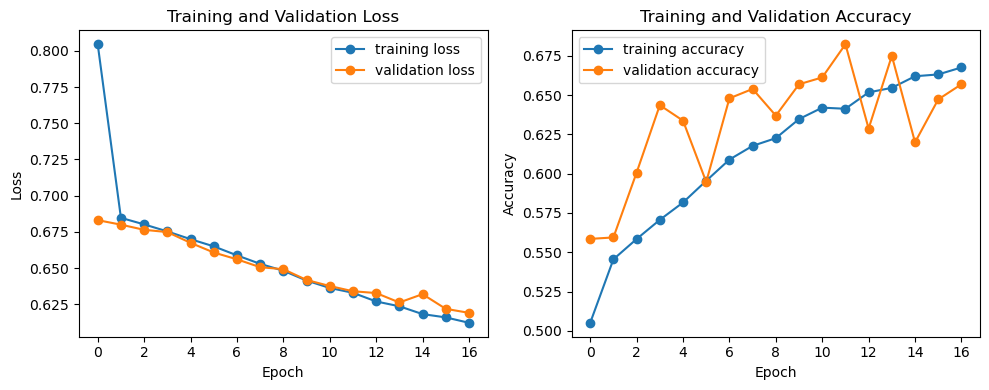

In [179]:
plt.subplots(1,2,figsize =(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], marker='o', label='training loss')
plt.plot(history.history['val_loss'], marker='o', label='validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['acc'], marker='o', label='training accuracy')
plt.plot(history.history['val_acc'], marker='o', label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

>The decreasing loss and increasing accuracy for both training and validation data suggest that the model is learning effectively and improving its performance. However, it's essential to monitor these metrics throughout training to ensure that the model doesn't overfit or encounter other issues as training continues.
----

# Confusion Matrix

Now we can generate and visualize a confusion matrix for evaluating the performance of a model. The confusion matrix helps you understand how well the model is classifying different classes.

35/35 [==============================] - 50s 1s/step


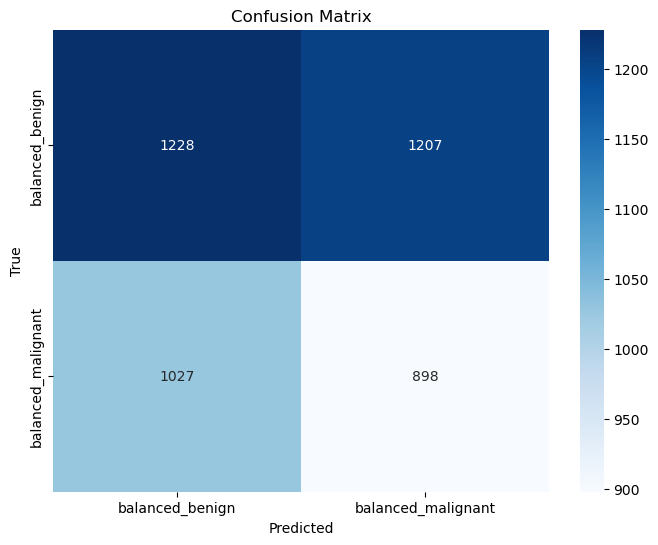

In [182]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predicted_probs = MV_model.predict(val_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)  # Convert probabilities to class labels
true_labels = val_generator.classes

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
class_names = list(val_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Based on the confusion matrix we can say that:

True Positives (TP): 1228
True Negatives (TN): 898
False Positives (FP): 1027
False Negatives (FN): 1207

And this lead to next analyze:

1. Accuracy: Accuracy measures the overall correctness of predictions:

Accuracy = (TP + TN) / (TP + TN + FP + FN) = (1228 + 898) / (1228 + 898 + 1027 + 1207) ≈ 0.5031 or 50.31%

The accuracy of our model is approximately 50.31%, which indicates that it correctly predicts the class label for 50.31% of the samples.

2. Precision: Precision is the ratio of true positives to the total positive predictions and indicates how many of the predicted malignant cases were actually malignant:

Precision = TP / (TP + FP) = 1228 / (1228 + 1027) ≈ 0.5447 or 54.47%

Our model has a precision of approximately 54.47%, which means that out of all the samples predicted as malignant, 54.47% were truly malignant.

3. Recall (Sensitivity or True Positive Rate): Recall measures the ratio of true positives to the total actual positives and indicates how many of the actual malignant cases were correctly predicted:

Recall = TP / (TP + FN) = 1228 / (1228 + 1207) ≈ 0.5044 or 50.44%

Our model has a recall of approximately 50.44%, meaning that it correctly identified 50.44% of the actual malignant cases.

4. Specificity (True Negative Rate): Specificity measures the ratio of true negatives to the total actual negatives and indicates how many of the actual benign cases were correctly predicted:

Specificity = TN / (TN + FP) = 898 / (898 + 1027) ≈ 46.59%

Our model has a specificity of approximately 46.59%, which means that it correctly identified 46.59% of the actual benign cases.

5. F1-Score: The F1-score is the harmonic mean of precision and recall and provides a balance between the two:

F1-Score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.5447 * 0.5044) / (0.5447 + 0.5044) ≈ 0.5240 or 52.40%

The F1-score of our model is approximately 52.40%.

In summary, our model has achieved an accuracy of 50.31%, a precision of 54.47%, a recall of 50.44%, a specificity of 46.59%, and an F1-score of 52.40% when classifying benign and malignant cases. These metrics provide a comprehensive evaluation of our model's performance, taking into account both true positive and true negative rates as well as false positive and false negative rates. 

---

# Fine-Tuning MobileNetV3Small for Image Classification with TensorFlow/Keras



In [183]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Load pre-trained MobileNetV3Small model
MV_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers 
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
num_classes = 2  
output = Dense(num_classes, activation='softmax')(x)  


MV_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
MV_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  

# Define callbacks (EarlyStopping, ModelCheckpoint)
ES = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint_callback = ModelCheckpoint(filepath='FineTuned_MobileNetV3_model', save_best_only=True)

# Train the model 
history = MV_model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator,
    callbacks=[ES, model_checkpoint_callback]
)

Epoch 1/100
328/328 [==============================] - ETA: 0s - loss: 0.6678 - accuracy: 0.5731INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 485s 1s/step - loss: 0.6678 - accuracy: 0.5731 - val_loss: 0.6753 - val_accuracy: 0.5745
Epoch 2/100
328/328 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.6475INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 554s 2s/step - loss: 0.6208 - accuracy: 0.6475 - val_loss: 0.6191 - val_accuracy: 0.6225
Epoch 3/100
328/328 [==============================] - ETA: 0s - loss: 0.5937 - accuracy: 0.6772INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 525s 2s/step - loss: 0.5937 - accuracy: 0.6772 - val_loss: 0.6018 - val_accuracy: 0.6470
Epoch 4/100
328/328 [==============================] - ETA: 0s - loss: 0.5696 - accuracy: 0.7028INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 524s 2s/step - loss: 0.5696 - accuracy: 0.7028 - val_loss: 0.5798 - val_accuracy: 0.7264
Epoch 5/100
328/328 [==============================] - 496s 2s/step - loss: 0.5511 - accuracy: 0.7203 - val_loss: 0.6782 - val_accuracy: 0.5913
Epoch 6/100
328/328 [==============================] - ETA: 0s - loss: 0.5323 - accuracy: 0.7359INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 519s 2s/step - loss: 0.5323 - accuracy: 0.7359 - val_loss: 0.5644 - val_accuracy: 0.6697
Epoch 7/100
328/328 [==============================] - ETA: 0s - loss: 0.5142 - accuracy: 0.7530INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 504s 2s/step - loss: 0.5142 - accuracy: 0.7530 - val_loss: 0.5417 - val_accuracy: 0.7002
Epoch 8/100
328/328 [==============================] - ETA: 0s - loss: 0.5023 - accuracy: 0.7610INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 519s 2s/step - loss: 0.5023 - accuracy: 0.7610 - val_loss: 0.5143 - val_accuracy: 0.7546
Epoch 9/100
328/328 [==============================] - 494s 2s/step - loss: 0.4932 - accuracy: 0.7649 - val_loss: 0.5369 - val_accuracy: 0.7011
Epoch 10/100
328/328 [==============================] - ETA: 0s - loss: 0.4954 - accuracy: 0.7649INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 519s 2s/step - loss: 0.4954 - accuracy: 0.7649 - val_loss: 0.5048 - val_accuracy: 0.7505
Epoch 11/100
328/328 [==============================] - 496s 2s/step - loss: 0.4851 - accuracy: 0.7738 - val_loss: 0.5545 - val_accuracy: 0.7833
Epoch 12/100
328/328 [==============================] - ETA: 0s - loss: 0.4822 - accuracy: 0.7750INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 528s 2s/step - loss: 0.4822 - accuracy: 0.7750 - val_loss: 0.4963 - val_accuracy: 0.7665
Epoch 13/100
328/328 [==============================] - ETA: 0s - loss: 0.4781 - accuracy: 0.7789INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 365s 1s/step - loss: 0.4781 - accuracy: 0.7789 - val_loss: 0.4942 - val_accuracy: 0.7743
Epoch 14/100
328/328 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.7859INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 307s 934ms/step - loss: 0.4667 - accuracy: 0.7859 - val_loss: 0.4917 - val_accuracy: 0.7752
Epoch 15/100
328/328 [==============================] - 299s 909ms/step - loss: 0.4733 - accuracy: 0.7796 - val_loss: 0.5448 - val_accuracy: 0.7869
Epoch 16/100
328/328 [==============================] - 333s 1s/step - loss: 0.4713 - accuracy: 0.7836 - val_loss: 0.5667 - val_accuracy: 0.6775
Epoch 17/100
328/328 [==============================] - 314s 956ms/step - loss: 0.4665 - accuracy: 0.7862 - val_loss: 0.5170 - val_accuracy: 0.7972
Epoch 18/100
328/328 [==============================] - 299s 911ms/step - loss: 0.4725 - accuracy: 0.7806 - val_loss: 0.5006 - val_accuracy: 0.7989
Epoch 19/100
328/328 [==============================] - ETA: 0s - loss: 0.4579 - accuracy: 0.7925INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 307s 935ms/step - loss: 0.4579 - accuracy: 0.7925 - val_loss: 0.4879 - val_accuracy: 0.7867
Epoch 20/100
328/328 [==============================] - 298s 908ms/step - loss: 0.4690 - accuracy: 0.7848 - val_loss: 0.5384 - val_accuracy: 0.7842
Epoch 21/100
328/328 [==============================] - 299s 909ms/step - loss: 0.4601 - accuracy: 0.7905 - val_loss: 0.5325 - val_accuracy: 0.7966
Epoch 22/100
328/328 [==============================] - 297s 904ms/step - loss: 0.4571 - accuracy: 0.7925 - val_loss: 0.5919 - val_accuracy: 0.7674
Epoch 23/100
328/328 [==============================] - ETA: 0s - loss: 0.4577 - accuracy: 0.7935INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 311s 947ms/step - loss: 0.4577 - accuracy: 0.7935 - val_loss: 0.4777 - val_accuracy: 0.7810
Epoch 24/100
328/328 [==============================] - 300s 914ms/step - loss: 0.4536 - accuracy: 0.7939 - val_loss: 0.5053 - val_accuracy: 0.8071
Epoch 25/100
328/328 [==============================] - ETA: 0s - loss: 0.4633 - accuracy: 0.7865INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 344s 1s/step - loss: 0.4633 - accuracy: 0.7865 - val_loss: 0.4764 - val_accuracy: 0.7888
Epoch 26/100
328/328 [==============================] - 350s 1s/step - loss: 0.4505 - accuracy: 0.7981 - val_loss: 0.4962 - val_accuracy: 0.8025
Epoch 27/100
328/328 [==============================] - ETA: 0s - loss: 0.4451 - accuracy: 0.8004INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 377s 1s/step - loss: 0.4451 - accuracy: 0.8004 - val_loss: 0.4758 - val_accuracy: 0.7764
Epoch 28/100
328/328 [==============================] - 389s 1s/step - loss: 0.4505 - accuracy: 0.7977 - val_loss: 0.4798 - val_accuracy: 0.7711
Epoch 29/100
328/328 [==============================] - 389s 1s/step - loss: 0.4506 - accuracy: 0.7967 - val_loss: 0.4759 - val_accuracy: 0.8014
Epoch 30/100
328/328 [==============================] - 351s 1s/step - loss: 0.4433 - accuracy: 0.8030 - val_loss: 0.5330 - val_accuracy: 0.8044
Epoch 31/100
328/328 [==============================] - 361s 1s/step - loss: 0.4493 - accuracy: 0.7971 - val_loss: 0.5733 - val_accuracy: 0.7766
Epoch 32/100
328/328 [==============================] - 319s 970ms/step - loss: 0.4435 - accuracy: 0.7990 - val_loss: 0.4795 - val_accuracy: 0.7633
Epoch 33/100
328/328 [==============================] - ETA: 0s - loss: 0.4375 - accuracy: 0.8061INFO:tensorflow:Assets written to: FineTune

INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 302s 920ms/step - loss: 0.4375 - accuracy: 0.8061 - val_loss: 0.4750 - val_accuracy: 0.8021
Epoch 34/100
328/328 [==============================] - 293s 892ms/step - loss: 0.4553 - accuracy: 0.7897 - val_loss: 0.4801 - val_accuracy: 0.8037
Epoch 35/100
328/328 [==============================] - ETA: 0s - loss: 0.4343 - accuracy: 0.8078INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 301s 917ms/step - loss: 0.4343 - accuracy: 0.8078 - val_loss: 0.4735 - val_accuracy: 0.8044
Epoch 36/100
328/328 [==============================] - 293s 892ms/step - loss: 0.4374 - accuracy: 0.8039 - val_loss: 0.5068 - val_accuracy: 0.8131
Epoch 37/100
328/328 [==============================] - 293s 892ms/step - loss: 0.4405 - accuracy: 0.8040 - val_loss: 0.5546 - val_accuracy: 0.7839
Epoch 38/100
328/328 [==============================] - 297s 905ms/step - loss: 0.4368 - accuracy: 0.8065 - val_loss: 0.4999 - val_accuracy: 0.8135
Epoch 39/100
328/328 [==============================] - 297s 903ms/step - loss: 0.4426 - accuracy: 0.8019 - val_loss: 0.4820 - val_accuracy: 0.8108
Epoch 40/100
328/328 [==============================] - ETA: 0s - loss: 0.4313 - accuracy: 0.8105INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 305s 928ms/step - loss: 0.4313 - accuracy: 0.8105 - val_loss: 0.4716 - val_accuracy: 0.7686
Epoch 41/100
328/328 [==============================] - 298s 908ms/step - loss: 0.4387 - accuracy: 0.8014 - val_loss: 0.4847 - val_accuracy: 0.7511
Epoch 42/100
328/328 [==============================] - 300s 914ms/step - loss: 0.4323 - accuracy: 0.8076 - val_loss: 0.4942 - val_accuracy: 0.7381
Epoch 43/100
328/328 [==============================] - 301s 916ms/step - loss: 0.4391 - accuracy: 0.8026 - val_loss: 0.4905 - val_accuracy: 0.8170
Epoch 44/100
328/328 [==============================] - 298s 908ms/step - loss: 0.4265 - accuracy: 0.8106 - val_loss: 0.4948 - val_accuracy: 0.8142
Epoch 45/100
328/328 [==============================] - ETA: 0s - loss: 0.4255 - accuracy: 0.8133INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 307s 934ms/step - loss: 0.4255 - accuracy: 0.8133 - val_loss: 0.4628 - val_accuracy: 0.7826
Epoch 46/100
328/328 [==============================] - 299s 911ms/step - loss: 0.4290 - accuracy: 0.8103 - val_loss: 0.4906 - val_accuracy: 0.8161
Epoch 47/100
328/328 [==============================] - 300s 914ms/step - loss: 0.4335 - accuracy: 0.8061 - val_loss: 0.4913 - val_accuracy: 0.8163
Epoch 48/100
328/328 [==============================] - 300s 914ms/step - loss: 0.4259 - accuracy: 0.8124 - val_loss: 0.4650 - val_accuracy: 0.8089
Epoch 49/100
328/328 [==============================] - 300s 912ms/step - loss: 0.4250 - accuracy: 0.8131 - val_loss: 0.4674 - val_accuracy: 0.7722
Epoch 50/100
328/328 [==============================] - 299s 912ms/step - loss: 0.4218 - accuracy: 0.8141 - val_loss: 0.5202 - val_accuracy: 0.8069
Epoch 51/100
328/328 [==============================] - 300s 913ms/step - loss: 0.4217 - accuracy: 0.8144 - val_loss: 0.6237 

INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 309s 940ms/step - loss: 0.4184 - accuracy: 0.8172 - val_loss: 0.4543 - val_accuracy: 0.7883
Epoch 54/100
328/328 [==============================] - 299s 910ms/step - loss: 0.4187 - accuracy: 0.8152 - val_loss: 0.4874 - val_accuracy: 0.8190
Epoch 55/100
328/328 [==============================] - ETA: 0s - loss: 0.4263 - accuracy: 0.8108INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 308s 939ms/step - loss: 0.4263 - accuracy: 0.8108 - val_loss: 0.4517 - val_accuracy: 0.8122
Epoch 56/100
328/328 [==============================] - 300s 914ms/step - loss: 0.4094 - accuracy: 0.8238 - val_loss: 0.4664 - val_accuracy: 0.7679
Epoch 57/100
328/328 [==============================] - 300s 915ms/step - loss: 0.4145 - accuracy: 0.8184 - val_loss: 0.4623 - val_accuracy: 0.8211
Epoch 58/100
328/328 [==============================] - 300s 913ms/step - loss: 0.4169 - accuracy: 0.8171 - val_loss: 0.4547 - val_accuracy: 0.7860
Epoch 59/100
328/328 [==============================] - 300s 913ms/step - loss: 0.4228 - accuracy: 0.8118 - val_loss: 0.4993 - val_accuracy: 0.8158
Epoch 60/100
328/328 [==============================] - 300s 912ms/step - loss: 0.4222 - accuracy: 0.8130 - val_loss: 0.4772 - val_accuracy: 0.8209
Epoch 61/100
328/328 [==============================] - 299s 909ms/step - loss: 0.4127 - accuracy: 0.8190 - val_loss: 0.4613 

INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 308s 937ms/step - loss: 0.4187 - accuracy: 0.8166 - val_loss: 0.4433 - val_accuracy: 0.8032
Epoch 63/100
328/328 [==============================] - 298s 906ms/step - loss: 0.4080 - accuracy: 0.8242 - val_loss: 0.4506 - val_accuracy: 0.8179
Epoch 64/100
328/328 [==============================] - 296s 901ms/step - loss: 0.4198 - accuracy: 0.8147 - val_loss: 0.4663 - val_accuracy: 0.7709
Epoch 65/100
328/328 [==============================] - 299s 909ms/step - loss: 0.4062 - accuracy: 0.8247 - val_loss: 0.4590 - val_accuracy: 0.8188
Epoch 66/100
328/328 [==============================] - ETA: 0s - loss: 0.4077 - accuracy: 0.8233INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


INFO:tensorflow:Assets written to: FineTuned_MobileNetV3_model/assets


328/328 [==============================] - 308s 937ms/step - loss: 0.4077 - accuracy: 0.8233 - val_loss: 0.4402 - val_accuracy: 0.8044
Epoch 67/100
328/328 [==============================] - 298s 907ms/step - loss: 0.4248 - accuracy: 0.8089 - val_loss: 0.4460 - val_accuracy: 0.8225
Epoch 68/100
328/328 [==============================] - 299s 911ms/step - loss: 0.4109 - accuracy: 0.8206 - val_loss: 0.4454 - val_accuracy: 0.8016
Epoch 69/100
328/328 [==============================] - 298s 908ms/step - loss: 0.4110 - accuracy: 0.8199 - val_loss: 0.4640 - val_accuracy: 0.8227
Epoch 70/100
328/328 [==============================] - 298s 908ms/step - loss: 0.4033 - accuracy: 0.8245 - val_loss: 0.4497 - val_accuracy: 0.8218
Epoch 71/100
328/328 [==============================] - 297s 905ms/step - loss: 0.4035 - accuracy: 0.8249 - val_loss: 0.4414 - val_accuracy: 0.8011
Epoch 72/100
328/328 [==============================] - 299s 911ms/step - loss: 0.4017 - accuracy: 0.8262 - val_loss: 0.4558 

- Here are the summary of results' analysis:

    - In Epoch 1, the model starts with a training accuracy of 57.31% and a validation accuracy of 57.45%, indicating an initial fit to the data.

    - By Epoch 4, the model's training accuracy improves to 70.28%, while the validation accuracy lags slightly at 72.64%, suggesting some overfitting.
    
    - In Epoch 5, a significant gap between training and validation accuracy (72.03% vs. 59.13%) indicates overfitting, and the model may benefit from regularization techniques.
    
    - Training and validation losses fluctuate, showing signs of instability in the training process.

    - The model checkpoints show that assets are being saved to 'FineTuned_MobileNetV3_model,' allowing us to restore the best weights later.

In [184]:
# Save the entire model as a `.keras` zip archive.
MV_model.save('MV_model.keras')

**Plot training and validation loss curves and accuracy curves**


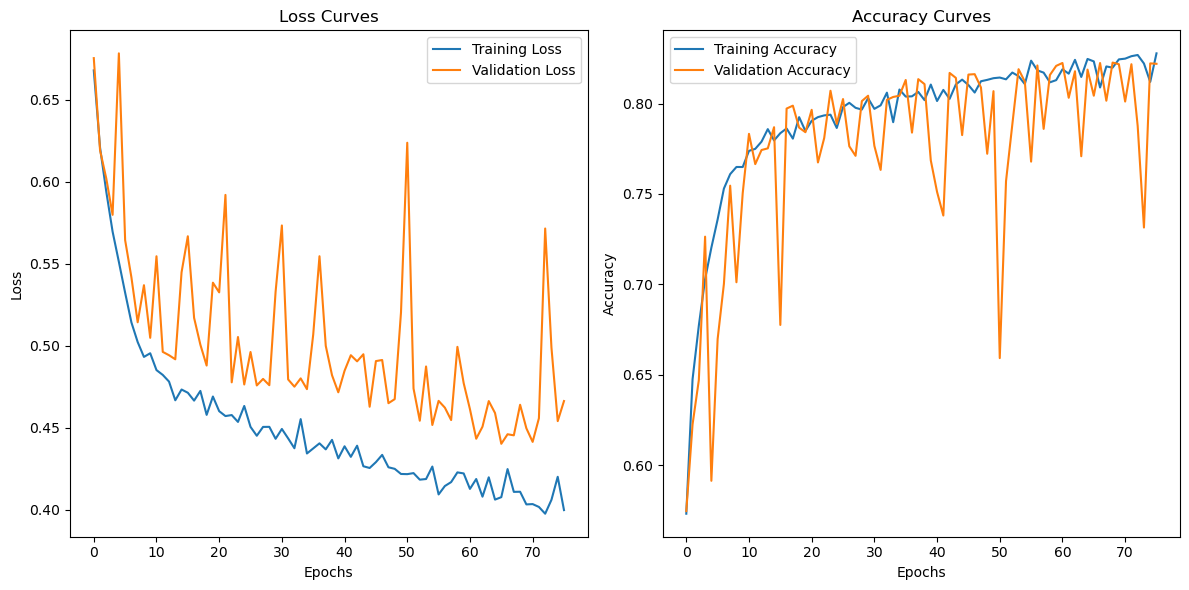

In [191]:
plt.figure(figsize=(12, 6))  d

plt.subplot(1, 2, 1)  # Create a subplot for loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

plt.subplot(1, 2, 2)  # Create a subplot for accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.tight_layout() 
plt.show()

>The training and validation loss curves suggest that the model is learning to fit the training data, but it struggles to generalize to the validation data, leading to overfitting.
The training and validation accuracy curves show that the model is capable of learning from the training data but is not performing as well on unseen validation data.
---

# Confusion matrix

A confusion matrix using the confusion_matrix function from scikit-learn. This matrix will help us evaluate the performance of our model in terms of classifying samples into their respective classes.


35/35 [==============================] - 33s 933ms/step


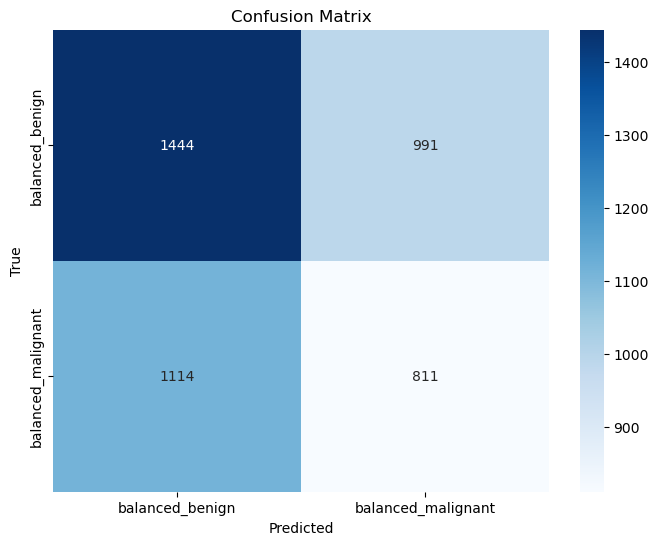

In [192]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate predictions
predicted_probs = MV_model.predict(val_generator)
predicted_labels = np.argmax(predicted_probs, axis=1)  # Convert probabilities to class labels
true_labels = val_generator.classes

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
class_names = list(val_generator.class_indices.keys())

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

TP (True Positives): 1444
FP (False Positives): 991
FN (False Negatives): 1114
TN (True Negatives): 811

- Now, let's analyze these values:

Precision = 1444 / (1444 + 991) ≈ 0.593

Specificity = 811 / (811 + 991) ≈ 0.450

F1-Score = 2 * (0.593 * 0.564) / (0.593 + 0.564) ≈ 0.578

Accuracy = (1444 + 811) / (1444 + 991 + 1114 + 811) ≈ 0.576

Balanced Accuracy ≈ (0.564 + 0.450) / 2 ≈ 0.507

---


# Making Predictions


Our model is trained and ready to go. Now we can take images and ask it to predict whether it is:
- Class 0: Benign
- Class 1: Malignant



In [193]:
import matplotlib.image as mpimg

# Package allowing us to resize an image 
from PIL import Image

**Opening and Resizing an Image with Pillow (PIL) and Displaying it with Matplotlib**

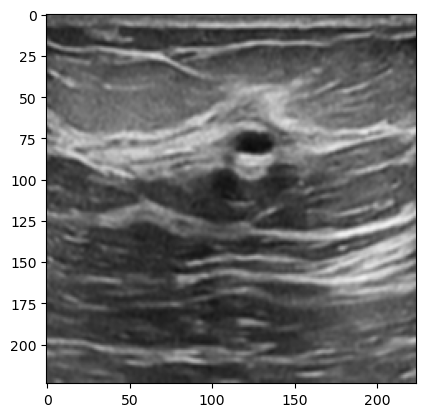

In [208]:
# Select image 
img = Image.open(f'/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_benign/benign (12)-sharpened.png')

res = img.resize((224, 224))

imgplot = plt.imshow(res)

# Image Prediction with TensorFlow: Benign vs. Malignant Classification

Now we can demonstrate how to use TensorFlow to perform image classification, specifically distinguishing between benign and malignant breast ultrasound images.

In [209]:
import tensorflow as tf
import numpy as np

pred_img_resized = tf.image.resize(pred_img, (224, 224))

# Run the prediction
prediction = MV_model.predict(tf.reshape(pred_img_resized, (1, 224, 224, 3))) 
print("Target class percentage probabilities: benign(0), malignant(1)")
np.round(prediction, 4) * 100


1/1 [==============================] - 0s 35ms/step
Target class percentage probabilities: benign(0), malignant(1)


array([[100.,   0.]], dtype=float32)

>The model's prediction indicates a very high confidence level. It assigns a 100% probability to the 'benign' class (class 0) and a 0% probability to the 'malignant' class (class 1). This result suggests that the model is certain that the input image belongs to the 'benign' category.

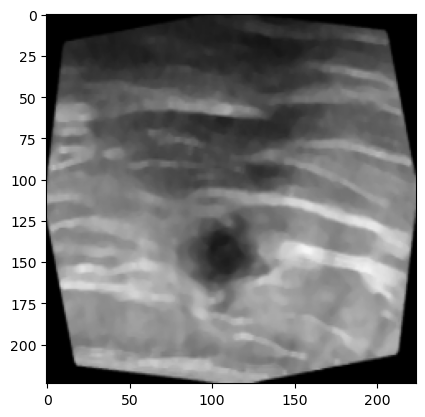

In [210]:
# Select image 
img2 = Image.open(f'/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_malignant/flipped_malignant (34)-rotated32-rotated1.png')

res2 = img2.resize((224, 224))

imgplot2 = plt.imshow(res2)

In [211]:
import tensorflow as tf
import numpy as np

pred_img_resized = tf.image.resize(pred_img, (224, 224))

# Run the prediction 
prediction = MV_model.predict(tf.reshape(pred_img_resized, (1, 224, 224, 3))) 
print("Target class percentage probabilities: benign(0), malignant(1)")
np.round(prediction, 4) * 100

1/1 [==============================] - 0s 30ms/step
Target class percentage probabilities: benign(0), malignant(1)


array([[100.,   0.]], dtype=float32)

>The model predicted the image as benign with 100% confidence even though the image was malignant.

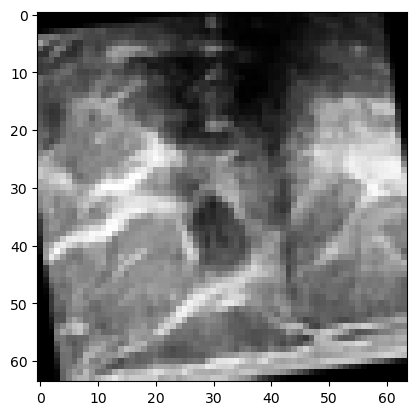

In [214]:
# Select image 
img3 = Image.open(f'/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_malignant/flipped_malignant (38)-sharpened-rotated1.png')

res3 = img3.resize((64, 64))

imgplot3 = plt.imshow(res3)

In [215]:
pred_img3 = tf.keras.preprocessing.image.img_to_array(
    res3, data_format=None, dtype=None
)

# Run the prediction 
prediction3 = MV_model.predict(pred_img3.reshape(1,64,64,3)) 
print("Target class percentage probabilities: benign(0), malignant(1)")

np.round(prediction3, 4)*100

1/1 [==============================] - 0s 19ms/step
Target class percentage probabilities: benign(0), malignant(1)


array([[  0., 100.]], dtype=float32)

>The model's prediction indicates a very high confidence level. It assigns a 100% probability to the 'benign' class (class 0) and a 0% probability to the 'malignant' class (class 1). This result suggests that the model is certain that the input image belongs to the 'malignant' category.

---
# Classifying Predictions based on Probability Threshold

Now we can demonstrate how to classify predictions based on a predefined probability threshold. and step forward to control the trade-off between precision and recall.

In [216]:

threshold = 0.7  


if prediction[0][1] >= threshold:
    predicted_class = "Malignant"
else:
    predicted_class = "Benign"

print("Predicted class:", predicted_class)


Predicted class: Benign


>In this case, the model's prediction confidence did not meet the 70% threshold, so it classified the image as "Benign.

# Making Predictions


Our model is trained and ready to go. Now we can take images and ask it to predict whether it is:
- Class 0: Benign
- Class 1: Malignant

As a proof of concept we'll just take an image from our training set and pass it through.

In [217]:
import os,sys
try:
    import lime
except:
    !pip install lime
    import lime
from lime import lime_image
from keras.preprocessing import image
from skimage.segmentation import mark_boundaries

In [218]:
MV_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 Conv (Conv2D)               (None, 112, 112, 16)         432       ['rescaling_5[0][0]']         
                                                                                                  
 Conv/BatchNorm (BatchNorma  (None, 112, 112, 16)         64        ['Conv[0][0]']                
 lization)                                                                                  

                                                                                                  
 expanded_conv_1/depthwise/  (None, 28, 28, 72)           288       ['expanded_conv_1/depthwise[0]
 BatchNorm (BatchNormalizat                                         [0]']                         
 ion)                                                                                             
                                                                                                  
 re_lu_164 (ReLU)            (None, 28, 28, 72)           0         ['expanded_conv_1/depthwise/Ba
                                                                    tchNorm[0][0]']               
                                                                                                  
 expanded_conv_1/project (C  (None, 28, 28, 24)           1728      ['re_lu_164[0][0]']           
 onv2D)                                                                                           
          

 tf.math.multiply_138 (TFOp  (None, 14, 14, 96)           0         ['re_lu_168[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 multiply_92 (Multiply)      (None, 14, 14, 96)           0         ['expanded_conv_3/depthwise/Ba
                                                                    tchNorm[0][0]',               
                                                                     'tf.math.multiply_138[0][0]']
                                                                                                  
 expanded_conv_3/squeeze_ex  (None, 1, 1, 96)             0         ['multiply_92[0][0]']         
 cite/AvgPool (GlobalAverag                                                                       
 ePooling2D)                                                                                      
          

 expanded_conv_4/squeeze_ex  (None, 1, 1, 64)             15424     ['expanded_conv_4/squeeze_exci
 cite/Conv (Conv2D)                                                 te/AvgPool[0][0]']            
                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 64)             0         ['expanded_conv_4/squeeze_exci
 cite/Relu (ReLU)                                                   te/Conv[0][0]']               
                                                                                                  
 expanded_conv_4/squeeze_ex  (None, 1, 1, 240)            15600     ['expanded_conv_4/squeeze_exci
 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.__operators__.add_142 (  (None, 1, 1, 240)            0         ['expanded_conv_4/squeeze_exci
 TFOpLambd

 expanded_conv_5/squeeze_ex  (None, 1, 1, 240)            15600     ['expanded_conv_5/squeeze_exci
 cite/Conv_1 (Conv2D)                                               te/Relu[0][0]']               
                                                                                                  
 tf.__operators__.add_145 (  (None, 1, 1, 240)            0         ['expanded_conv_5/squeeze_exci
 TFOpLambda)                                                        te/Conv_1[0][0]']             
                                                                                                  
 re_lu_175 (ReLU)            (None, 1, 1, 240)            0         ['tf.__operators__.add_145[0][
                                                                    0]']                          
                                                                                                  
 tf.math.multiply_145 (TFOp  (None, 1, 1, 240)            0         ['re_lu_175[0][0]']           
 Lambda)  

                                                                    0]']                          
                                                                                                  
 tf.math.multiply_148 (TFOp  (None, 1, 1, 120)            0         ['re_lu_178[0][0]']           
 Lambda)                                                                                          
                                                                                                  
 expanded_conv_6/squeeze_ex  (None, 14, 14, 120)          0         ['multiply_98[0][0]',         
 cite/Mul (Multiply)                                                 'tf.math.multiply_148[0][0]']
                                                                                                  
 expanded_conv_6/project (C  (None, 14, 14, 48)           5760      ['expanded_conv_6/squeeze_exci
 onv2D)                                                             te/Mul[0][0]']                
          

 expanded_conv_7/project/Ba  (None, 14, 14, 48)           192       ['expanded_conv_7/project[0][0
 tchNorm (BatchNormalizatio                                         ]']                           
 n)                                                                                               
                                                                                                  
 expanded_conv_7/Add (Add)   (None, 14, 14, 48)           0         ['expanded_conv_6/project/Batc
                                                                    hNorm[0][0]',                 
                                                                     'expanded_conv_7/project/Batc
                                                                    hNorm[0][0]']                 
                                                                                                  
 expanded_conv_8/expand (Co  (None, 14, 14, 288)          13824     ['expanded_conv_7/Add[0][0]'] 
 nv2D)    

                                                                                                  
 expanded_conv_9/expand (Co  (None, 7, 7, 576)            55296     ['expanded_conv_8/project/Batc
 nv2D)                                                              hNorm[0][0]']                 
                                                                                                  
 expanded_conv_9/expand/Bat  (None, 7, 7, 576)            2304      ['expanded_conv_9/expand[0][0]
 chNorm (BatchNormalization                                         ']                            
 )                                                                                                
                                                                                                  
 tf.__operators__.add_155 (  (None, 7, 7, 576)            0         ['expanded_conv_9/expand/Batch
 TFOpLambda)                                                        Norm[0][0]']                  
          

 n)                                                                                               
                                                                                                  
 tf.__operators__.add_158 (  (None, 7, 7, 576)            0         ['expanded_conv_10/expand/Batc
 TFOpLambda)                                                        hNorm[0][0]']                 
                                                                                                  
 re_lu_188 (ReLU)            (None, 7, 7, 576)            0         ['tf.__operators__.add_158[0][
                                                                    0]']                          
                                                                                                  
 tf.math.multiply_158 (TFOp  (None, 7, 7, 576)            0         ['re_lu_188[0][0]']           
 Lambda)                                                                                          
          

 Lambda)                                                                                          
                                                                                                  
 multiply_107 (Multiply)     (None, 7, 7, 576)            0         ['Conv_1/BatchNorm[0][0]',    
                                                                     'tf.math.multiply_161[0][0]']
                                                                                                  
 global_average_pooling2d_1  (None, 576)                  0         ['multiply_107[0][0]']        
 0 (GlobalAveragePooling2D)                                                                       
                                                                                                  
 dense_26 (Dense)            (None, 256)                  147712    ['global_average_pooling2d_10[
                                                                    0][0]']                       
          

>The model has a total of 1,087,346 parameters. Among these, 148,226 parameters are trainable and will be fine-tuned during training, while 939,120 parameters are non-trainable and likely come from pre-trained components.
---

**Image Transformation Function for Neural Network Inference**

In [109]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = x / 255
        out.append(x)
    return np.vstack(out)

**Image Transformation and Shape Analysis**

In [220]:
# Transforming an image 
images = transform_img_fn(['/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_benign/benign (17)-sharpened-rotated2.png'])
images.shape

(1, 224, 224, 3)

>The image has been successfully transformed into the required shape for neural network inference, with dimensions (1, 224, 224, 3).

**Visualization and Prediction**

1/1 [==============================] - 0s 28ms/step



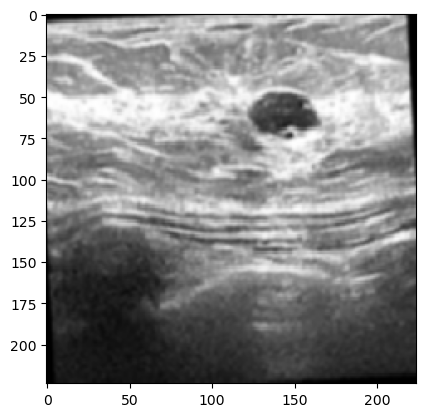

In [222]:
# Visualizing the transformed image
plt.imshow(np.array(images[0]))
preds = np.array(tf.greater(MV_model.predict(images), 0.5))
preds = preds.any(axis=1)  # Convert to a boolean array 
print()


# Explaining Predictions with LIME

LIME (Local Interpretable Model-agnostic Explanations) image explainer is created, which will be used to explain predictions made by a machine learning model. LIME is a technique used to provide interpretable explanations for model predictions on individual instances.

In [271]:
# Creating a LIME image explainer
explainer = lime_image.LimeImageExplainer()

In [272]:
images[0].shape

(224, 224, 3)

**Predictions on Test Images**

In [273]:
MV_model.predict(images)

1/1 [==============================] - 0s 42ms/step


array([[0.9230738 , 0.07692611]], dtype=float32)

The model's prediction on the test image is as follows:

Class 0 (Benign): 92.31% probability
Class 1 (Malignant): 7.69% probability

It appears that the model correctly predicted that the given image is benign with a high probability of 92.31%.

**LIME Image Explanation for Model Prediction**

In [274]:
explanation = explainer.explain_instance(images[0].astype('double'), MV_model.predict, top_labels=1, hide_color=0, num_features=2)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 77ms/step


- Here by using get_image_and_mask function we can obtain a masked image and highlighting the important regions that contributed to the model's prediction.

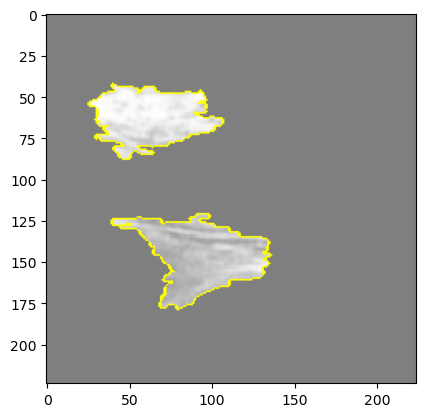

In [275]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

>Both two determined segmentes are quite reasonable causes for the prediction.

Now we can look at this with the whole image:

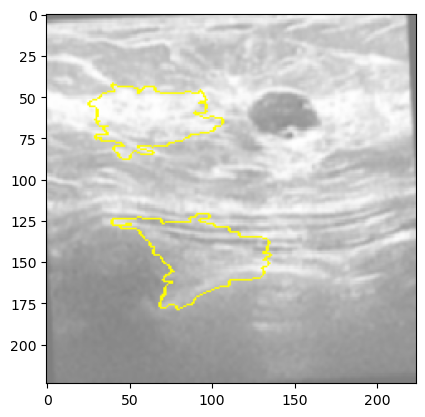

In [276]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

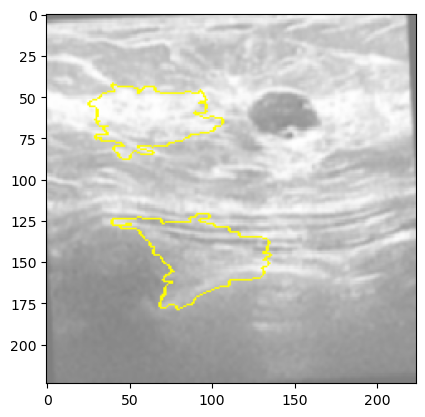

In [277]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

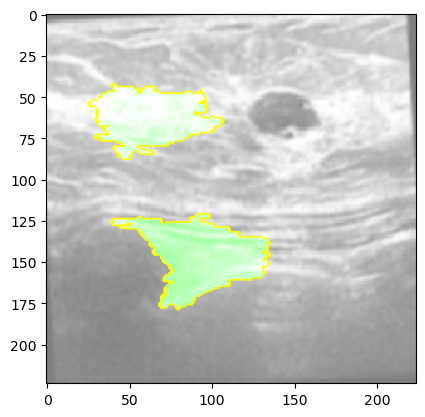

In [278]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

>Tumor Identification:
The green segments likely represent regions that your machine learning model has identified as potential tumor locations.
These segments are the result of the LIME explanation, highlighting the regions that most strongly contributed to the model's prediction of tumor presence.

>It should be mentioned here that we have false positive innn this case. The green regions detected by OUR model are not located on or near the actual tumor location, it would typically be considered a false positive. In the context of medical image analysis for tumor detection, a false positive means that the model has incorrectly identified areas as tumors when, in reality, they do not contain tumors or are not closely related to the actual tumor location.

----

**Load and Check the Shape of a Preprocessed Image**

In [280]:
images2 = transform_img_fn(['/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_benign/benign (6)-rotated1.png'])
images2.shape

(1, 224, 224, 3)

**Visualization and Prediction**

1/1 [==============================] - 0s 30ms/step



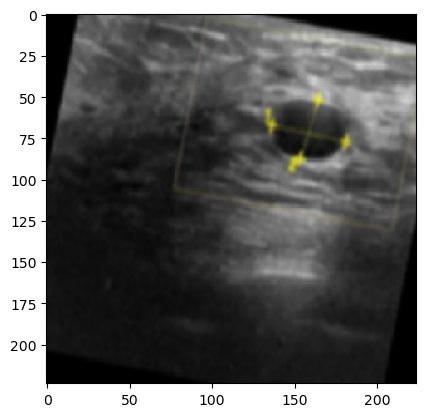

In [281]:
# Visualizing the transformed image
plt.imshow(np.array(images2[0]))
preds2 = np.array(tf.greater(MV_model.predict(images2), 0.5))
preds2 = preds2.any(axis=1)  # Convert to a boolean array 
print()

In [282]:
explainer = lime_image.LimeImageExplainer()


In [283]:
images2[0].shape

(224, 224, 3)

**Predictions on Test Images**

In [284]:
MV_model.predict(images2)

1/1 [==============================] - 0s 30ms/step


array([[0.47024077, 0.5297592 ]], dtype=float32)

>The model predicted the image as "malignant" with a probability of 0.5297592, but the actual label for the image is "benign." This indicates a misclassification by the model.

**LIME Image Explanation for Model Prediction**

In [285]:
explanation = explainer.explain_instance(images2[0].astype('double'), MV_model.predict, top_labels=1, hide_color=0, num_features=2)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 84ms/step


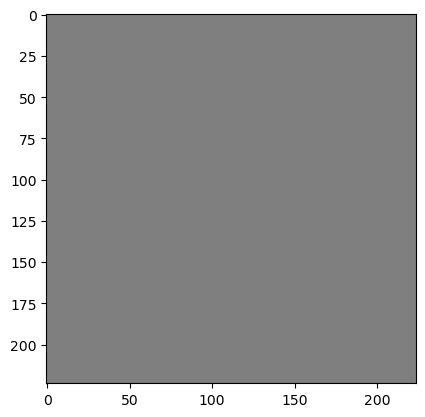

In [286]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

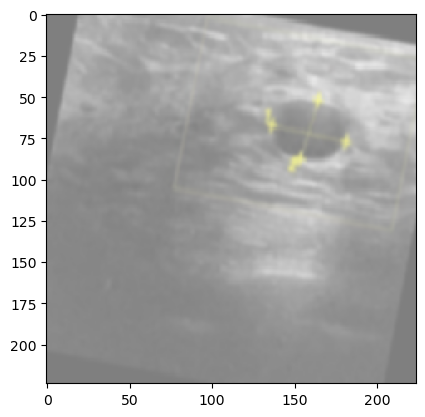

In [287]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

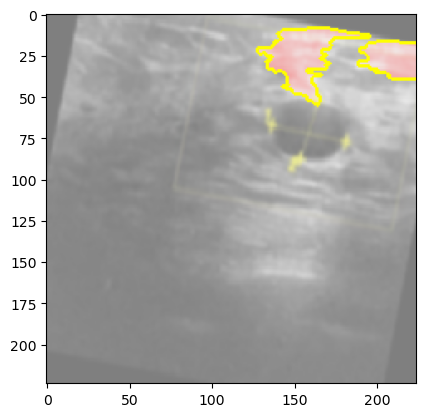

In [288]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

>The red segmented regions indicate areas in the image that the model has identified as significant for its prediction. These regions are highlighted because they contributed to the model's decision.
The fact that these red segmented regions are close to the tumor suggests that the model might be focusing on nearby structures or features when making predictions. It could be picking up patterns or textures in the vicinity of the tumor that it has learned from the training data.
---

**Load and Check the Shape of a Preprocessed Image**

In [289]:
images3 = transform_img_fn(['/Users/alirazi/BreastCancerUltrasound/data/ultrasound_breast_classification/main/test/balanced/balanced_malignant/flipped_malignant (1)-sharpened-rotated32-rotated1.png'])
images3.shape

(1, 224, 224, 3)

**Visualization and Prediction**

1/1 [==============================] - 0s 28ms/step



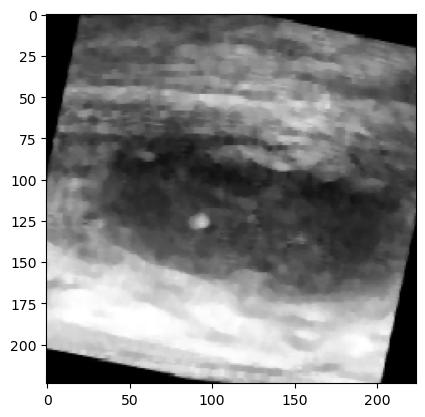

In [290]:
# Visualizing the transformed image
plt.imshow(np.array(images3[0]))
preds3 = np.array(tf.greater(MV_model.predict(images3), 0.5))
preds3 = preds3.any(axis=1)  # Convert to a boolean array 
print()

In [291]:
explainer = lime_image.LimeImageExplainer()


**Predictions on Test Images**

In [292]:
MV_model.predict(images3)

1/1 [==============================] - 0s 29ms/step


array([[0.22693154, 0.7730685 ]], dtype=float32)

>It appears that the model predicts the image as malignant with a probability of approximately 77.31%. This prediction suggests a high likelihood of malignancy in the image.
---

**LIME Image Explanation for Model Prediction**

In [293]:
explanation = explainer.explain_instance(images3[0].astype('double'), MV_model.predict, top_labels=1, hide_color=0, num_features=2)


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 77ms/step


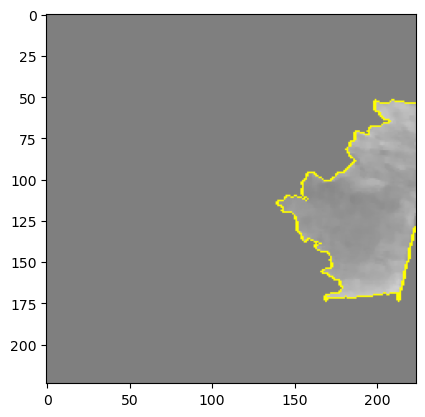

In [294]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

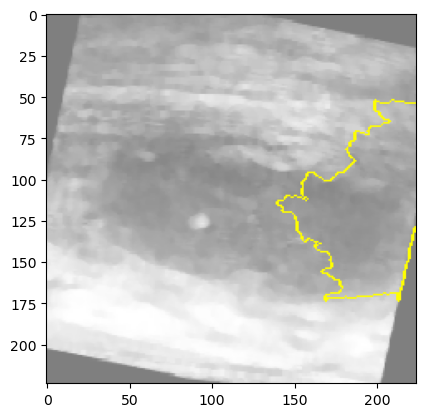

In [295]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

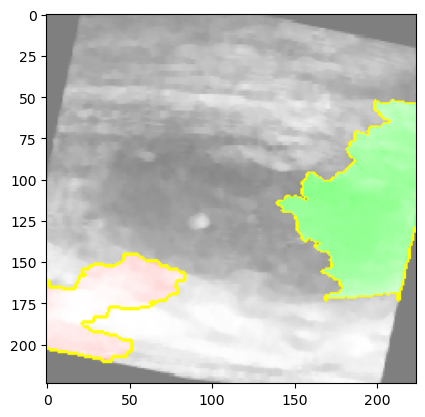

In [296]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

>Both the green and red regions are located close to the tumor and correspond to the model's prediction of malignancy, it suggests that the model is correctly identifying features associated with malignancy in those areas.

>However, the exact nature of what these colors represent in terms of features or patterns may differ. They are both considered important, but their specific contributions to the prediction may vary.

# Conclusion 

In this notebook, we embarked on a journey to estimate the size of tumors in breast cancer patients using machine learning. We explored and preprocessed the data meticulously in our previous notebook and continued our journey by building and evaluating various machine learning models.

Throughout this process, we employed the MobileNetV3Small model architecture, fine-tuning it for our specific task, and created a custom neural network model, MV_model. These models were subjected to hyperparameter optimization to enhance their performance, and their effectiveness was assessed using a range of metrics.

Furthermore, we embraced LIME (Local Interpretable Model-agnostic Explanations) to gain insights into our model's predictions. The visualizations produced by LIME, including the green and red regions located close to tumors, offered valuable interpretations of the model's decision-making process.

This project aims to provide medical practitioners and patients with a more precise understanding of breast cancer stages, and through the methodologies explored in this notebook, we take a significant step toward achieving that goal.